In [5]:
from rfpipe import candidates, state, metadata
import pylab as plt
import numpy as np
import glob
%matplotlib inline

In [27]:
def get_orig_state(cc):
    sdm = cc.metadata.filename
    preffile = '/lustre/aoc/observers/nm-10222/fetchrf/scripts/realfast.yml'
    gainpath = '/home/mchammer/evladata/telcal/2019/12/'
    bdfdir = metadata.get_bdfdir(sdmfile=sdm, sdmscan=1)
    band = metadata.sdmband(sdmfile=sdm, sdmscan=1, bdfdir=bdfdir)
    st_orig = state.State(sdmfile=sdm, sdmscan=1, preffile=preffile, 
                     name='NRAOdefault'+band, showsummary=False, bdfdir=bdfdir)
    return st_orig

def make_snr_dm_plot(cc, st_orig, original_detection=None):
    sdmname = '_'.join(cc.metadata.datasetId.split('_')[1:])
    dm_orig = original_detection[sdmname][0]
    snr_orig = original_detection[sdmname][2] #snr1

    dmarr_orig = np.array(st_orig.dmarr)
    c_dms = cc.canddm[np.where(cc.canddm > 0)]
    c_snrs = cc.snrtot[np.where(cc.canddm > 0)]
    c_snr_max = c_snrs[c_snrs == c_snrs.max()][0]
    c_dm_max_snr = c_dms[c_snrs == c_snrs.max()][0]

    dms = dmarr_orig[(dmarr_orig < c_dms.max()) & (dmarr_orig > c_dms.min())]
    plt.figure()
    fig,ax = plt.subplots(1, figsize=(10,8))
    ax.scatter(c_dms,c_snrs, s=15)
    
    plt.plot([dm_orig], [snr_orig], linestyle= '', marker='^', markersize=10, color="red", label='Original detection')
    
    for dm in dms:
        plt.axvline(x=dm, color='k', marker='.', alpha=0.5, label=f'line at x = {dm}') # Markers for dms in original dmarray
    plt.xlabel('DM')
    plt.ylabel('SNR')
    plt.legend()
    title = f'\n Source: {cc.metadata.source}'
    title = title+f'\n maxsnr: {c_snr_max:.2f} at dm: {c_dm_max_snr:.4f}'
    title = title+f'\n detection snr: {snr_orig:.2f} at dm orig: {dm_orig:.4f}'
    title = title+'\n'+cc.metadata.datasetId
    plt.title(title)
    plt.grid()
    plt.show()

In [28]:
pkls = glob.glob('fine_dm/*pkl')

In [29]:
original_detection = {}
# DM, SNRtot, SNR1
original_detection['TFST0001_sb37598254_1_1_000.58833.909638495374_1576534842510'] = (155.8, 20, 20)
original_detection['TFST0001_sb37598254_1_1_000.58833.909638495374_1576533804760'] = (155.8, 19.3, 19.3)
original_detection['TFST0001_sb37598254_1_1_000.58833.909638495374_1576533418790'] = (164, 43, 39.5)
original_detection['TFST0001_sb37598254_1_1_000.58833.909638495374_1576534279350'] = (155.8, 21.5, 21.5)
original_detection['TFST0001_sb37598254_1_1_000.58833.909638495374_1576534691780'] = (155.8, 21.5, 21.4)

2020-01-13 12:44:08,782 - rfpipe.metadata - INFO - Reading metadata from /lustre/aoc/projects/fasttransients/staging/realfast_TFST0001_sb37598254_1_1_000.58833.909638495374_1576534842510, scan 1
2020-01-13 12:44:08,840 - rfpipe.preferences - INFO - Parsing preffile for preference set NRAOdefaultL
2020-01-13 12:44:08,864 - rfpipe.metadata - INFO - Reading metadata from /lustre/aoc/projects/fasttransients/staging/realfast_TFST0001_sb37598254_1_1_000.58833.909638495374_1576534842510, scan 1


<Figure size 432x288 with 0 Axes>

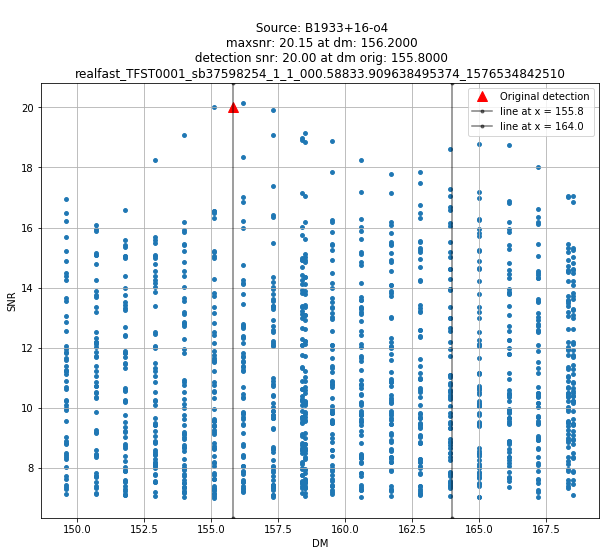

2020-01-13 12:44:09,377 - rfpipe.metadata - INFO - Reading metadata from /lustre/aoc/projects/fasttransients/staging/realfast_TFST0001_sb37598254_1_1_000.58833.909638495374_1576533804760, scan 1
2020-01-13 12:44:09,433 - rfpipe.preferences - INFO - Parsing preffile for preference set NRAOdefaultL
2020-01-13 12:44:09,452 - rfpipe.metadata - INFO - Reading metadata from /lustre/aoc/projects/fasttransients/staging/realfast_TFST0001_sb37598254_1_1_000.58833.909638495374_1576533804760, scan 1


<Figure size 432x288 with 0 Axes>

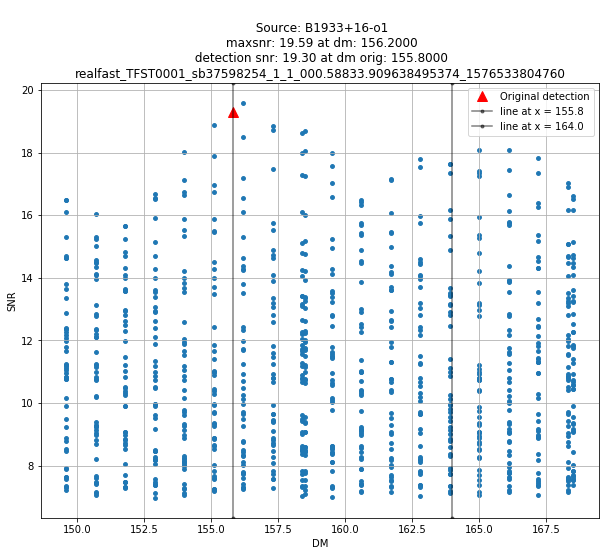

2020-01-13 12:44:09,988 - rfpipe.metadata - INFO - Reading metadata from /lustre/aoc/projects/fasttransients/staging/realfast_TFST0001_sb37598254_1_1_000.58833.909638495374_1576533418790, scan 1
2020-01-13 12:44:10,045 - rfpipe.preferences - INFO - Parsing preffile for preference set NRAOdefaultL
2020-01-13 12:44:10,065 - rfpipe.metadata - INFO - Reading metadata from /lustre/aoc/projects/fasttransients/staging/realfast_TFST0001_sb37598254_1_1_000.58833.909638495374_1576533418790, scan 1


<Figure size 432x288 with 0 Axes>

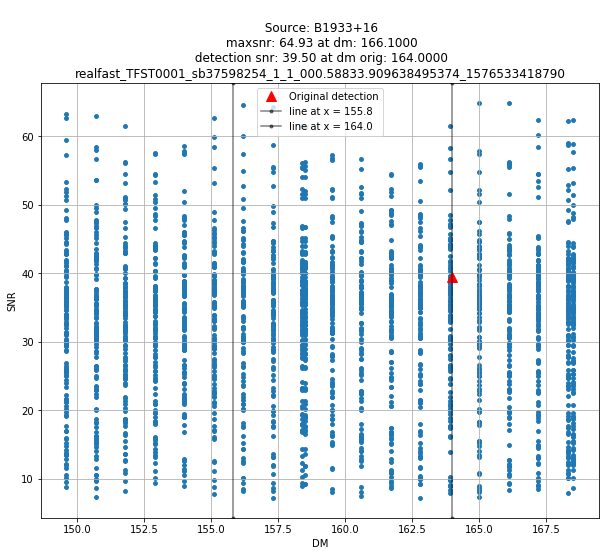

2020-01-13 12:44:10,714 - rfpipe.metadata - INFO - Reading metadata from /lustre/aoc/projects/fasttransients/staging/realfast_TFST0001_sb37598254_1_1_000.58833.909638495374_1576534279350, scan 1
2020-01-13 12:44:10,771 - rfpipe.preferences - INFO - Parsing preffile for preference set NRAOdefaultL
2020-01-13 12:44:10,790 - rfpipe.metadata - INFO - Reading metadata from /lustre/aoc/projects/fasttransients/staging/realfast_TFST0001_sb37598254_1_1_000.58833.909638495374_1576534279350, scan 1


<Figure size 432x288 with 0 Axes>

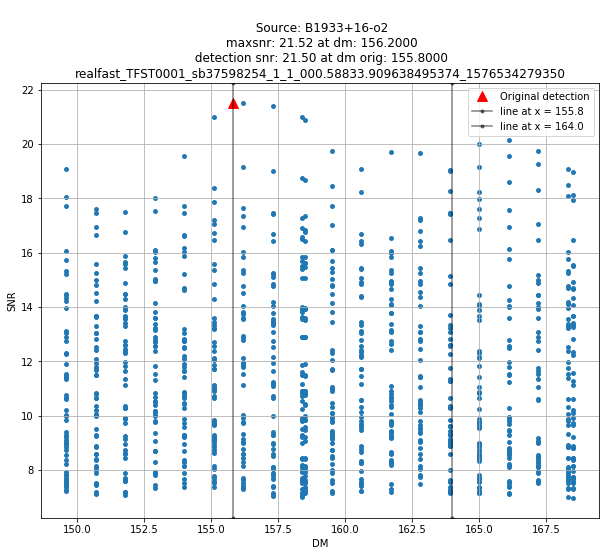

2020-01-13 12:44:11,309 - rfpipe.metadata - INFO - Reading metadata from /lustre/aoc/projects/fasttransients/staging/realfast_TFST0001_sb37598254_1_1_000.58833.909638495374_1576534691780, scan 1
2020-01-13 12:44:11,368 - rfpipe.preferences - INFO - Parsing preffile for preference set NRAOdefaultL
2020-01-13 12:44:11,480 - rfpipe.metadata - INFO - Reading metadata from /lustre/aoc/projects/fasttransients/staging/realfast_TFST0001_sb37598254_1_1_000.58833.909638495374_1576534691780, scan 1


<Figure size 432x288 with 0 Axes>

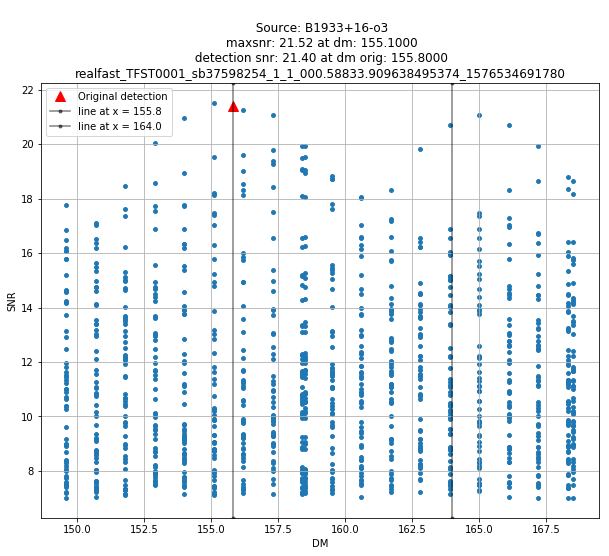

In [30]:
for pkl in pkls:
    ccs = list(candidates.iter_cands(pkl, select='candcollection'))
    assert len(ccs) == 1
    cc = ccs[0]
    st_orig = get_orig_state(cc)
    make_snr_dm_plot(cc, st_orig, original_detection)